In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib widget
import scipy.fft
from scipy.io import wavfile
import numpy as np
folder = "orange_10deg"
samplerate, data = wavfile.read(folder + "/orange_cup_micro_inside.wav")
primary_channel = 0
print(data.shape)

(2211740, 2)


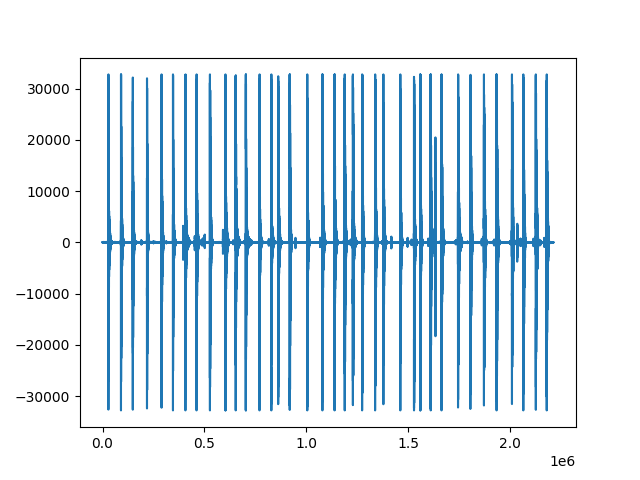

In [2]:
fig,ax = plt.subplots(1)
ax.plot(np.arange(data.shape[0]), data[:,primary_channel])
# for phone audio
# ax.plot(np.arange(data.shape[0]), data)

In [7]:
def found_beginning(data, start = 0, level=10000):
    for i,el in enumerate(data[start:]):
        if np.abs(el) > level:
            return start + i
    raise Exception("Not found error")
# red_cup_points = np.round([0,1.68e5,3.4e5,5.01e5,6.65e5,8.26e5,9.9e5, 1.13e6, 1.28e6, 1.45e6, 1.6e6, 1.76e6, 1.93e6, 2.19e6, 2.41e6, 2.66e6])
# big_cup_points_phone = np.round([0,2.5e5,4.6e5,6.8e5,8.75e5,1.07e6, 1.29e6, 1.5e6, 1.7e6, 1.91e6, 2.13e6, 2.34e6, 2.54e6, 2.76e6, 2.97e6, 3.17e6])
# small_cup_points = np.round([0,3.1e5,5.5e5,8.5e5,1.13e6,1.42e6, 1.61e6, 1.83e6, 2.03e6, 2.30e6, 2.61e6, 2.91e6, 3.1e6, 3.3e6, 3.5e6, 3.75e6])
# orange10_points = np.round([0,1.84e5, 4.1e5, 5.7e5, 7e5, 8.1e5, 9.6e5, 1.07e6, 1.21e6, 1.33e6, 1.45e6, 1.57e6, 1.68e6, 1.79e6, 1.90e6, 2.04e6, 2.16e6,2.30e6, 2.44e6, 2.56e6, 2.68e6, 2.82e6, 2.95e6, 3.08e6, 3.21e6, 3.35e6, 3.48e6, 3.63e6, 3.75e6, 3.85e6, 3.96e6, 4.07e6, 4.18e6, 4.32e6, 4.45e6, 4.58e6, 4.75e6])
orange10_points_micro_inside = np.round([0,80000, 140000, 200000, 280000, 340000, 400000, 460000, 520000, 600000, 650000, 700000, 760000, 820000, 856000, 910000, 1000000,1075000,1135000 , 1183000, 1225000, 1269000, 1333000, 1374000, 1456000, 1523000, 1553000, 1606000, 1658000, 1739000, 1800000, 1865000, 1929000, 2004000, 2060000, 2122000, 2174000])
start_points = np.array(orange10_points_micro_inside, dtype=int)
improved_start_points = np.array(list(map(lambda st: found_beginning(data[:,primary_channel],st), start_points)))
# improved_start_points = np.array(list(map(lambda st: found_beginning(data,st), start_points)))
end_points = np.round(improved_start_points + .3*samplerate).astype(int)
regions = np.vstack([improved_start_points,end_points])
region_size = (end_points - improved_start_points)[0]
print(regions.shape)

(2, 37)


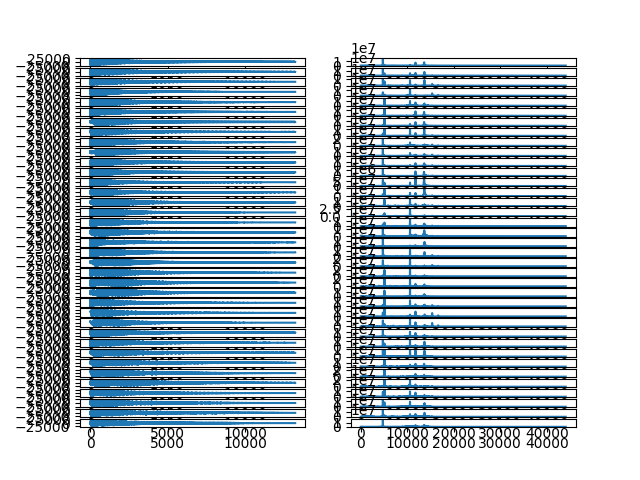

In [8]:
fig,ax = plt.subplots(nrows=regions.shape[1] , ncols=2) 
spectrum = np.empty([regions.shape[1], region_size//2])
# koef = 44100/region_size
koef = 88200/region_size
x = np.arange(0,region_size//2)*koef

for reg in range(regions.shape[1]): 
    subdata = data[regions[0,reg]:regions[1,reg],primary_channel]
    # subdata = data[regions[0,reg]:regions[1,reg]]
    subdata = np.convolve(subdata, np.ones(3)/3, mode='valid')
    ax[reg,0].plot(subdata)
    y=np.abs(scipy.fft.fft(subdata))
    spectrum[reg,:-1] = y[0:subdata.shape[0]//2]
    ax[reg,1].plot(x[:-1], spectrum[reg,:-1])

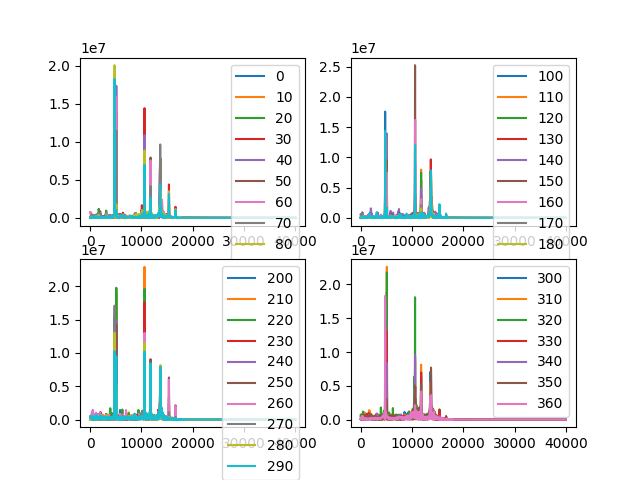

In [9]:
degrees = np.arange(0, 370, 10)
peaks =np.array([[4730, 5060, 10568, 11750, 5595], [4780, 5116, 10639, 11789, 5610]])
ampl = np.empty([peaks.shape[1], degrees.shape[0]])
fig,ax = plt.subplots(2, 2) 
for quarter in range(4):
    for reg in range(10):
        if 10*quarter+reg == 37: break
        ax[quarter//2,quarter%2].plot(x[:6000], spectrum[10*quarter+reg][:6000])
        for i in range(peaks.shape[1]): 
            ampl[i,10*quarter+reg] = np.amax(spectrum[10*quarter+reg][round(peaks[0][i]/koef):round(peaks[1][i]/koef)]) 
    ax[quarter//2,quarter%2].legend([str(degree) for degree in degrees[quarter*10:10*quarter+reg+1]])
    # ax[quarter//2,quarter%2].set_yscale("log")
# for i in range(peaks.shape[1]): print(i, ampl[i]/1e7)

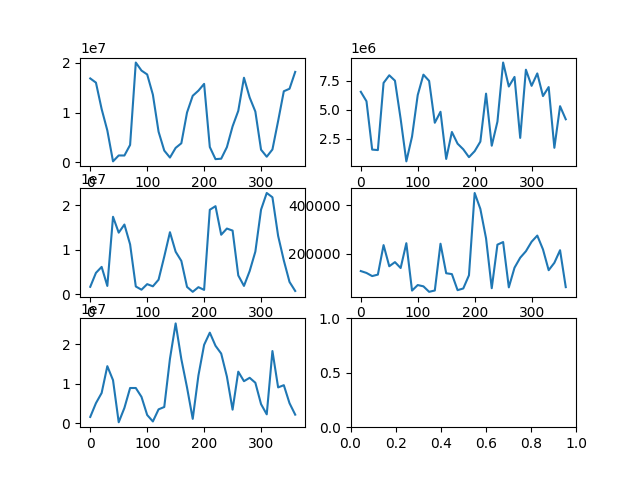

In [6]:
fig,ax = plt.subplots(peaks.shape[1]//2+1, 2) 
for peak in range(peaks.shape[1]):
    ax[peak%(peaks.shape[1]//2+1)][round(2*peak//(peaks.shape[1]+1))].plot(degrees, ampl[peak])
    
    
    